# Plot L1-norm of the filters in Keras

### L1-norms:
- To calculate the L1-norm we take the absolute values of the filter’s weights and add them all up. 
- It can help in deciding which filters are more important than other. 


- Calculate and plot the L1-norm of the pre-trained network
- Calculate and plot the L1-norm of the user defined network

### Pre-trained model

In [8]:
# import required packages

import numpy as np
import keras
from keras.applications.mobilenet import MobileNet
from keras import optimizers
from keras import backend as K
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
# define functions for calculating and ploting l1 norms

def get_l1_norms(model, layer_ix):
    # Get the weights for the layer.
    layer = model.layers[layer_ix]
    W = layer.get_weights()[0]

    l1 = np.sum(np.abs(W), axis=(0,1,2)) # Sum up all the weights for each filter.
    # Make list of (filter_ix, l1_norm), sorted by l1_norm (low to high).
    l1_norms = sorted(list(zip(range(len(l1)), l1)), key=lambda x: x[1])
    return l1_norms

def plot_l1_norms(model, layer_ix):
    fig = plt.figure(figsize=(10, 5))
    plt.plot(list(map(lambda x: x[1], get_l1_norms(model, layer_ix))))
    plt.xlabel("Output channel", fontsize=18)
    plt.ylabel("L1 norm", fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.tick_params(axis='both', which='minor', labelsize=10)
    plt.title(model.layers[layer_ix].name, fontsize=18)

In [10]:
# load pre-trained model: MobileNet

model = MobileNet(weights="imagenet")
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["categorical_accuracy", "top_k_categorical_accuracy"])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
# display model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [12]:
# list all the filters as per their l1 norms, change the layer number if required

get_l1_norms(model, 2) # 2, 8, 15

[(21, 1.0656013e-12),
 (4, 1.7071902e-12),
 (0, 2.1430878e-12),
 (3, 2.338214e-12),
 (8, 2.3532266e-12),
 (11, 2.3709752e-12),
 (20, 2.9634366e-12),
 (16, 8.437427e-12),
 (15, 0.0011365683),
 (31, 0.059039243),
 (24, 0.117784366),
 (14, 2.8666399),
 (19, 3.313794),
 (18, 3.3720832),
 (12, 3.398555),
 (25, 3.4286895),
 (6, 3.466902),
 (2, 3.6932757),
 (30, 4.034289),
 (28, 4.216182),
 (13, 4.417476),
 (23, 4.475396),
 (7, 4.7453146),
 (27, 5.14607),
 (1, 5.7779856),
 (17, 5.8317356),
 (22, 6.1938715),
 (5, 6.2981462),
 (29, 6.542287),
 (9, 6.893329),
 (26, 7.580257),
 (10, 8.477756)]

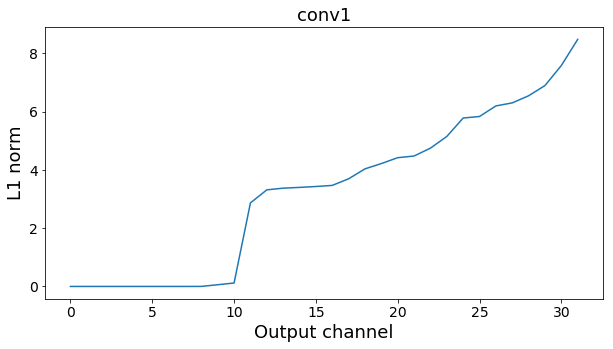

In [13]:
# plot l1 norms

plot_l1_norms(model, 2) # change the layer number to for which you want to plot the all the filters with l1 norms

In [14]:
print("Number of filters in layer = ",len(get_l1_norms(model,2)))

Number of filters in layer =  32


## Plot L1 norms: for user defined model

In [15]:
# import required packages

import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.applications.mobilenet import MobileNet
from keras.models import Model

In [16]:
# define some variables

batch_size = 128
num_classes = 10
epochs = 1
img_rows, img_cols = 28, 28

In [17]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [18]:
# create model 

K.clear_session()
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                294944    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 296,522
Trainable params: 296,522
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_test, y_test))

In [33]:
get_l1_norms(model,1) # change layer index: 0 or 1, because there are only two convolution layer

[(1, 5.4545584),
 (4, 5.8838787),
 (13, 5.9378324),
 (10, 6.3196425),
 (0, 6.670324),
 (7, 6.7687883),
 (6, 6.947216),
 (12, 7.041111),
 (5, 7.2182207),
 (9, 7.311121),
 (15, 7.466948),
 (11, 7.887587),
 (8, 8.238199),
 (2, 9.122864),
 (3, 9.732643),
 (14, 10.054463)]

In [34]:
print("Number of fiters=", len(get_l1_norms(model,1)))

Number of fiters= 16


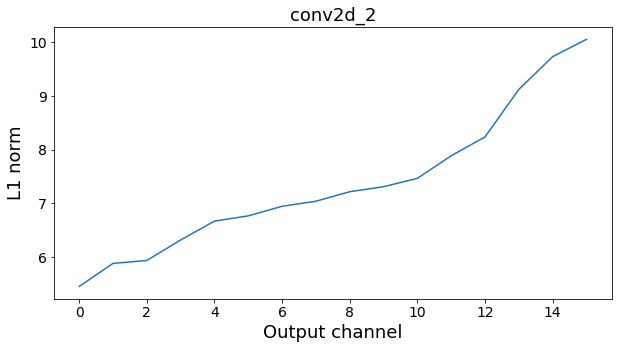

In [35]:
plot_l1_norms(model,1)

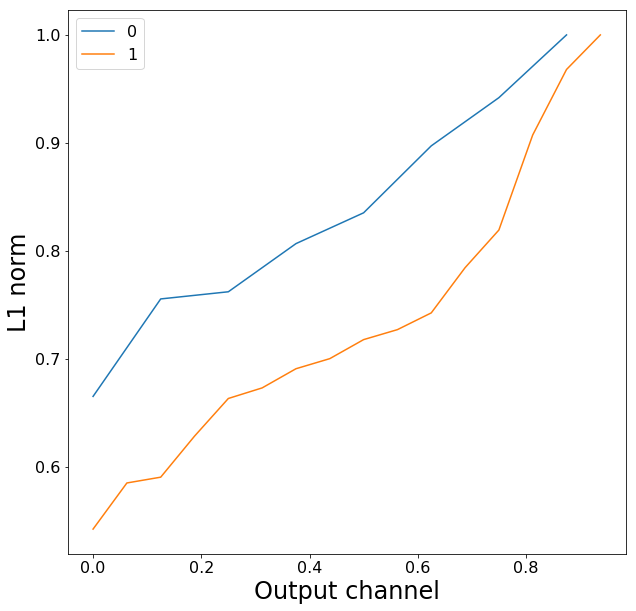

In [41]:
# plot l1 norms of all the layers

layer_ixs= [0,1]
fig = plt.figure(figsize=(10, 10))
for layer_ix in layer_ixs:
    l1_norms = get_l1_norms(model, layer_ix)
    max_value = l1_norms[-1][1]
    xs = np.arange(0, 1, 1. / len(l1_norms))
    ys = list(map(lambda x: x[1] / max_value, l1_norms))
    plt.plot(xs, ys)
    
plt.legend(layer_ixs, fontsize=16)
plt.xlabel("Output channel", fontsize=24)
plt.ylabel("L1 norm", fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=12)

In [45]:
# total number of parameters

para=int(np.sum([K.count_params(p) for p in set(model.trainable_weights)]))
print("Total number of learnable parameters in the network = ",para)

Total number of learnable parameters in the network =  296522
